In [253]:
import numpy as np
from numpy.linalg import norm, inv
import matplotlib.pylab as plt

In [254]:
a = 200 
b = 1 
f = 25
def banana(x, y):
    return a*(x**2-y)**2+b*(x-1)**2+f
def dx_banana(x, y):
    return 4*a*(x**2-y)*x+2*b*(x-1)
def dy_banana(x, y):
    return -2*a*(x**2-y)
def dxdx_banana(x, y):
    return 4*a*(3*x**2-y)+2*b
def dydy_banana(x, y):
    return 2*a
def dxdy_banana(x, y):
    return -4*a*x
def banana_grad(x, y):
    return np.array([dx_banana(x, y), dy_banana(x, y)])
def banana_h(x, y):
    return np.array([[dxdx_banana(x, y), dxdy_banana(x, y)], [dxdy_banana(x, y), dydy_banana(x, y)]]) 
def banana_invh(x, y):
    return 1/(dxdx_banana(x, y)*dydy_banana(x, y)-dxdy_banana(x, y)*dxdy_banana(x, y))*np.array(
        [[dydy_banana(x, y), -dxdy_banana(x, y)], [-dxdy_banana(x, y), dxdx_banana(x, y)]]
    )


In [255]:
def golden_section(f, a, b,eps):
    Fi = (1+np.sqrt(5))/2
    while True:
        x1 = b-(b-a)/Fi 
        x2 = a+(b-a)/Fi 
        y1 = f(x1)
        y2 = f(x2)
        if y1 >= y2:
            a = x1 
        else:
            b = x2 
        if abs(b-a) < eps:
            return (a+b)/2


In [256]:
def GD(f, x, grad_f, eps1,beta1, eps2, M):
    gg = []
    k = 0
    while True:
        grad = grad_f(*x)
        if norm(grad) < eps1:
            return x, gg
        if k>=M:
            return x, gg
        a = golden_section(lambda a: f(*(x-a*grad)), 0, 1, beta1)
        x_new = x - a*grad
        gg.append(f(*x_new))
        if norm(x_new-x) < eps1 and abs(f(*x_new)-f(*x)) < eps2:
            return x_new, gg
        else:
            k+=1
            x = x_new

In [257]:
def FR(f, x, grad_f, eps1,beta1, beta2,eps2, M):
    gg = []
    k = 0 
    prev_grad = 0
    prev_d = 0
    while True:
        grad = grad_f(*x)
        if norm(grad) < eps1:
            return x, gg
        if k>=M:
            return x, gg
        if k == 0:
            d = -grad 
        else:
            if k % 2 == 0:
                w = 0 
            else:
                w = norm(grad)**2/norm(prev_grad)**2
            d = -grad+w*prev_d 
        a = golden_section(lambda a: f(*(x+a*d)), 0, 1, beta1)
        x_new = x+a*d
        gg.append(f(*x_new))
        if norm(x_new-x) < beta2 and abs(f(*x_new)-f(*x)) < eps2:
            return x_new, gg
        else:
            k+=1
            x = x_new
            prev_grad = grad 
            prev_d = d


In [258]:
def PR(f, x, grad_f, eps1,beta1, beta2,eps2, M):
    gg = []
    k = 0 
    prev_grad = 0
    prev_d = 0
    while True:
        grad = grad_f(*x)

        if norm(grad) < eps1:
            return x, gg
        if k>=M:
            return x, gg
        if k == 0:
            d = -grad 
        else:
            if k % 2 == 0:
                w= 0
            else:
                w = np.dot(grad, (grad-prev_grad))/norm(prev_grad)**2
            d = -grad+w*prev_d 
        a = golden_section(lambda a: f(*(x+a*d)), 0, 1, beta1)
        x_new = x+a*d
        gg.append(f(*x_new))
        if norm(x_new-x) < beta2 and abs(f(*x_new)-f(*x)) < eps2:
            return x_new, gg
        else:
            k+=1
            x = x_new
            prev_grad = grad 
            prev_d = d

In [259]:
def DFP(f, x, grad_f, eps1,beta1, beta2,eps2, M):
    gg = []
    k = 0 
    prev_G = 0
    prev_x = 0 
    prev_grad = 0
    while True:
        grad = grad_f(*x)
        if norm(grad) < eps1:
            return x, gg
        if k>=M:
            return x, gg
        if k==0:
            G = np.identity(np.shape(x)[0])
        else:
            d_g = grad-prev_grad 
            d_x = x - prev_x 
            mat_d_x = np.matrix(d_x)
            mat_d_g = np.matrix(d_g)
            d_G = mat_d_x.T@mat_d_x/(mat_d_x@mat_d_g.T)-prev_G@mat_d_g.T@mat_d_g@G.T/(mat_d_g@G@mat_d_g.T)
            G = prev_G+d_G
            G = np.array(G)
        d = -G@grad
        a = golden_section(lambda a: f(*(x+a*d)), 0, 1, beta1)
        x_new = x+a*d
        gg.append(f(*x_new))
        if norm(x_new-x) < beta2 and abs(f(*x_new)-f(*x)) < eps2:
            return x_new, gg
        else:
            k+=1
            prev_x = x
            x = x_new
            prev_grad = grad 
            prev_G = G 

        

In [260]:
def LM(f, x, grad_f, h_f, eps1, M):
    gg = []
    E = np.identity(np.shape(x)[0])
    k = 0
    mu = np.max(h_f(*x))*10 
    while True:
        grad = grad_f(*x)
        if norm(grad) < eps1:
            return x, gg
        if k>=M:
            return x, gg
        H = h_f(*x)
        d = -inv(H+mu*E)@grad 
        x_new = x+d 
        gg.append(f(*x_new))
        if f(*x_new) < f(*x):
            k+=1
            mu/=2
            x = x_new
        else:
            k+=1
            mu*=2
            x = x_new
                


In [261]:
eps1 = 10**-3
eps2 = 10**-3
beta1 = 10**-10
beta2 = 10**-3
epoch = 100
ep = np.array(range(1, epoch+1))
glob_gg = []
x = np.array([3., 3.])

In [262]:
x_0, gg= GD(banana, x, banana_grad, eps1, beta1, eps2, epoch)
glob_gg.append(gg)
print(banana(*x_0))

33.614001995905745


In [263]:
x_0, gg= FR(banana, x, banana_grad, eps1, beta1, beta2, eps2, epoch)
glob_gg.append(gg)
print(banana(*x_0))

26.007633066569507


In [264]:
x_0, gg= PR(banana, x, banana_grad, eps1, beta1, beta2, eps2, epoch)
glob_gg.append(gg)
print(banana(*x_0))

26.007600222368374


In [265]:
x_0, gg= DFP(banana, x, banana_grad, eps1, beta1, beta2, eps2, epoch)
glob_gg.append(gg)
print(banana(*x_0))

25.000000000084025


In [266]:
x_0, gg= LM(banana, x, banana_grad, banana_h, eps1, epoch)
glob_gg.append(gg)
print(banana(*x_0))

25.00000000000118


In [267]:
def draw_plot(x, label):
    plt.plot(
        x, linestyle='-', label=label
    )
    plt.xlabel("Iterations")
    plt.ylabel("f(x, y)")
    plt.legend()
    plt.savefig(f'{label}.jpg')
    plt.show()

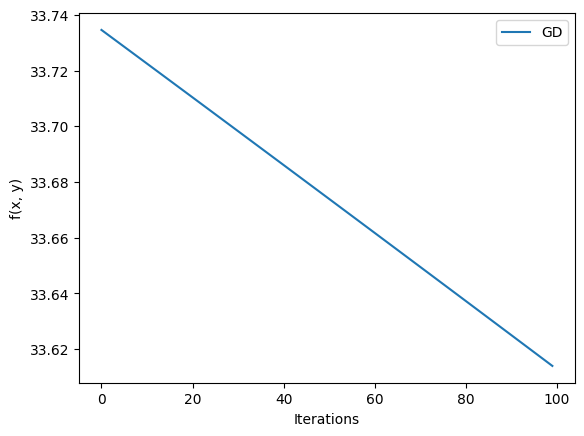

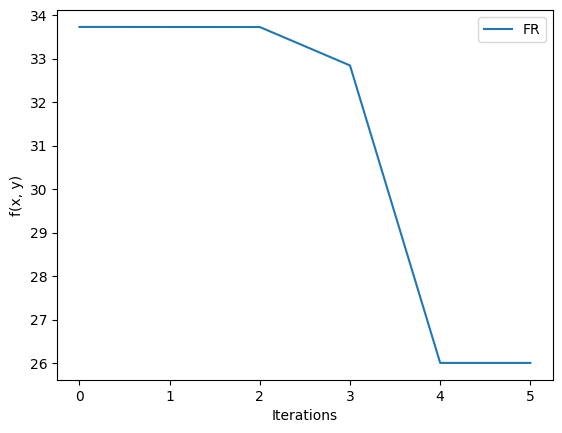

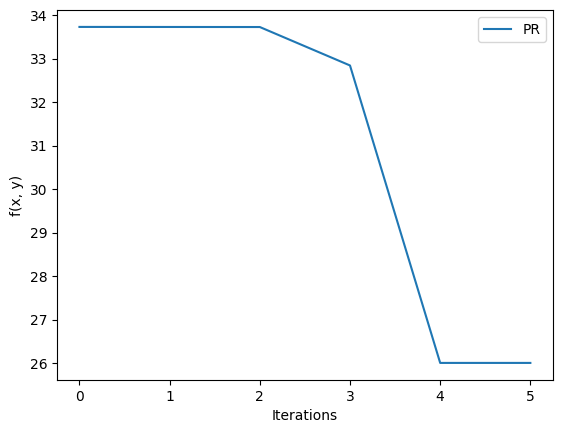

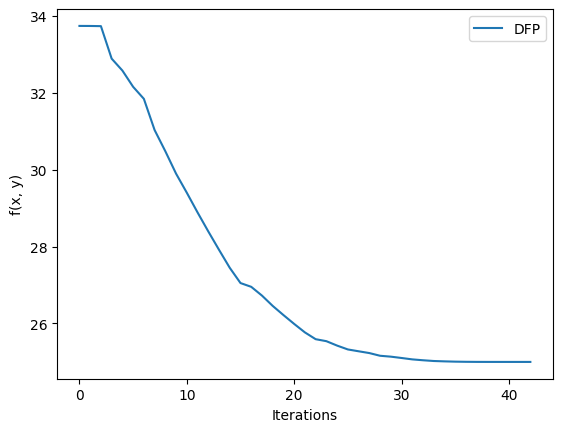

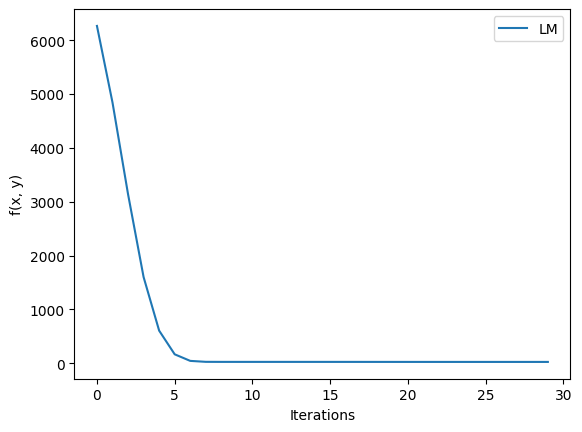

In [268]:
for i, j in zip(glob_gg, ["GD", 'FR',"PR", "DFP", "LM"]):
    draw_plot(i, j)